In [24]:
import pandas as pd

df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [43]:
null_values = df.isnull().sum()
print(null_values)
# no null values!

TV             0
Radio          0
Newspaper      0
Sales          0
expenditure    0
profit         0
dtype: int64


In [26]:
# adding some features
df['expenditure'] = df['Newspaper'] + df['Radio'] + df['TV']
df['profit'] = df['Sales'] - df['expenditure']
df

,TV,Radio,Newspaper,Sales,expenditure,profit
0,230.1,37.8,69.2,22.1,337.1,-315.0
1,44.5,39.3,45.1,10.4,128.9,-118.5
2,17.2,45.9,69.3,12.0,132.4,-120.4
3,151.5,41.3,58.5,16.5,251.3,-234.8
4,180.8,10.8,58.4,17.9,250.0,-232.1
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7,-48.1
196,94.2,4.9,8.1,14.0,107.2,-93.2
197,177.0,9.3,6.4,14.8,192.7,-177.9
198,283.6,42.0,66.2,25.5,391.8,-366.3


In [27]:
# EDA
df.describe().round(2)

,TV,Radio,Newspaper,Sales,expenditure,profit
count,200.00,200.00,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13,200.86,-185.73
std,85.85,14.85,21.78,5.28,92.99,88.12
min,0.70,0.00,0.30,1.60,11.70,-409.80
25%,74.38,9.98,12.75,11.00,123.55,-261.92
50%,149.75,22.90,25.75,16.00,207.35,-190.00
75%,218.82,36.52,45.10,19.05,281.12,-112.15
max,296.40,49.60,114.00,27.00,433.60,-6.90


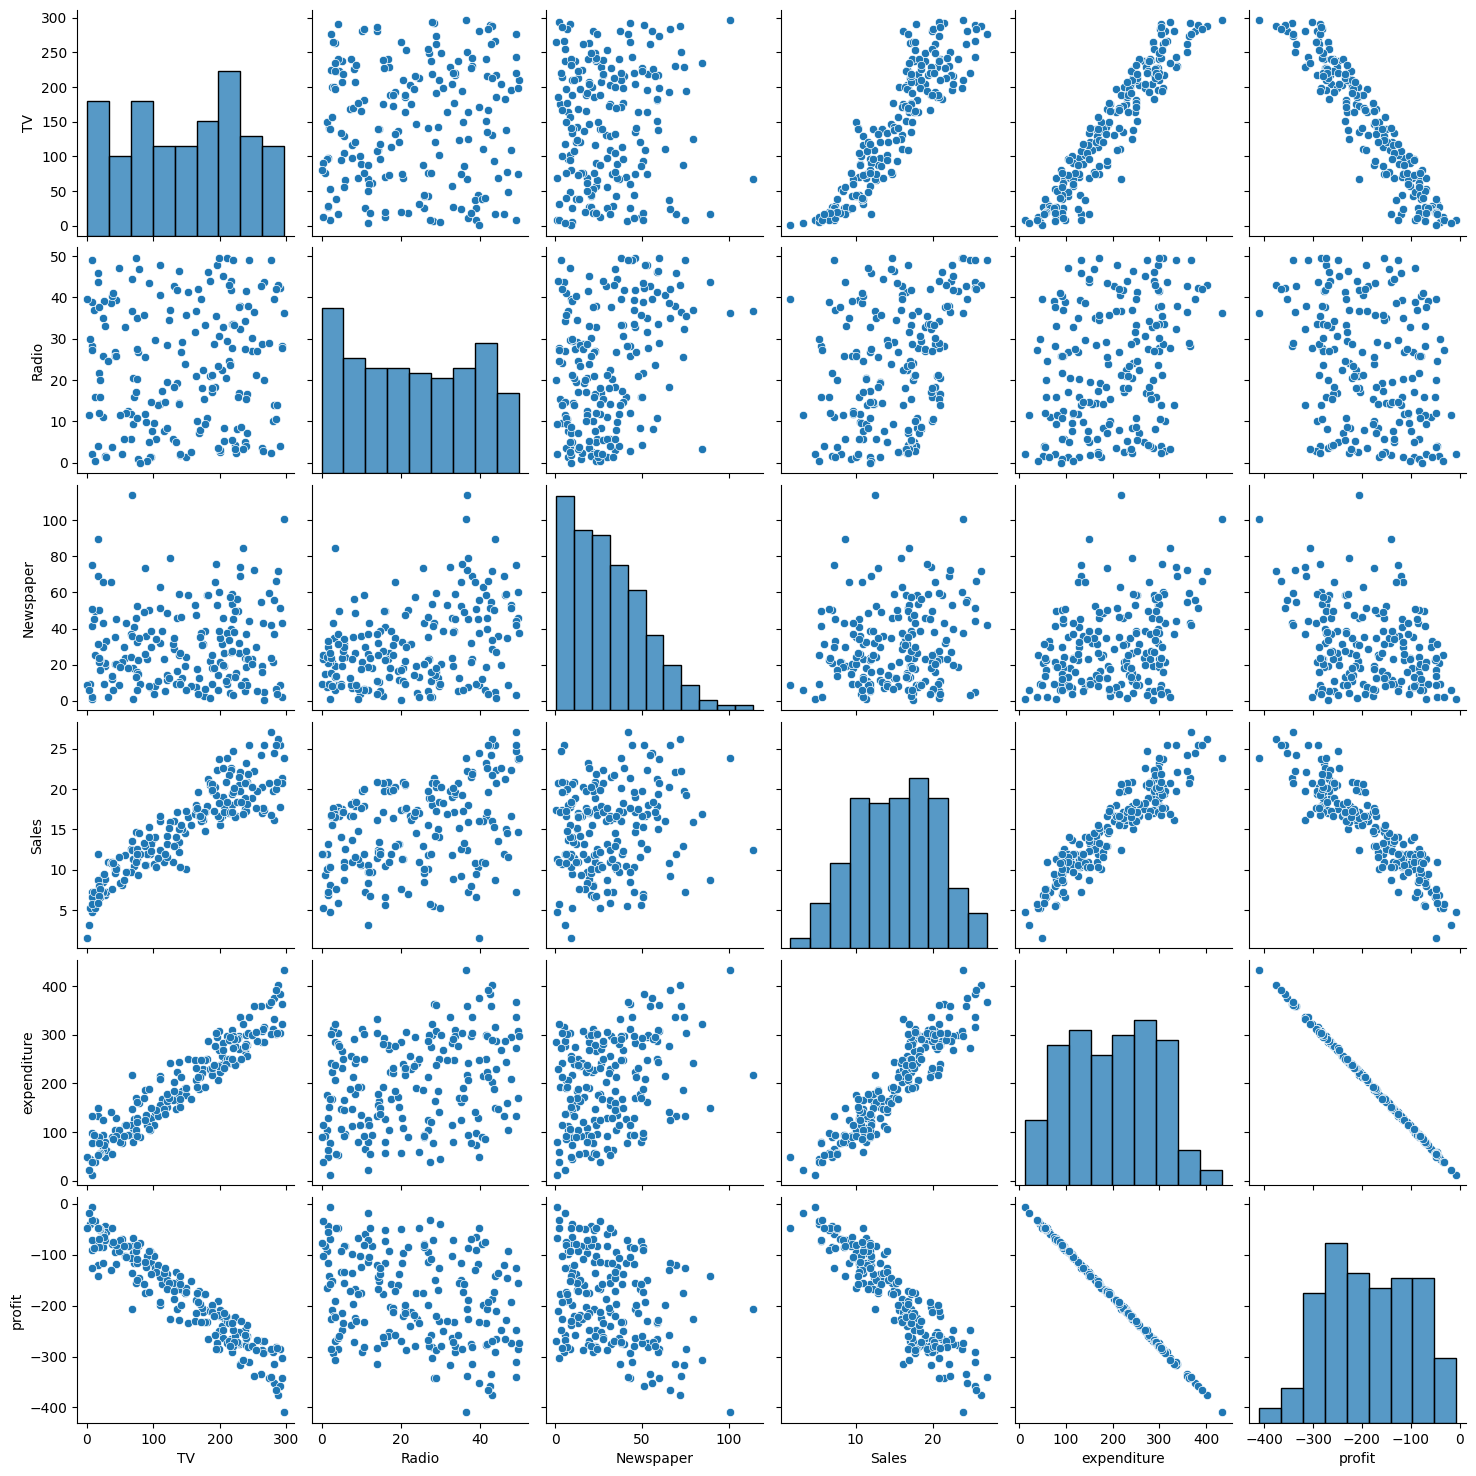

In [28]:
# visualizing the data to get an overview of the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'Sales', 'expenditure', 'profit']])
plt.show()



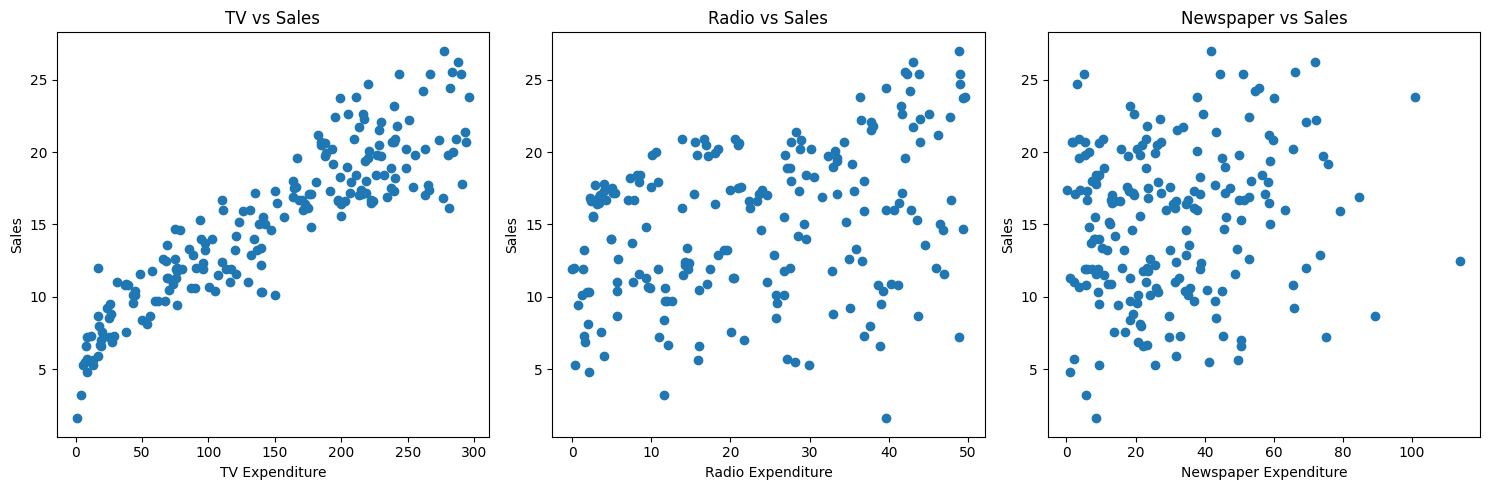

In [29]:
# scatter plots to show the relationship between individual advertising channels and sales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Expenditure')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio Expenditure')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper Expenditure')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

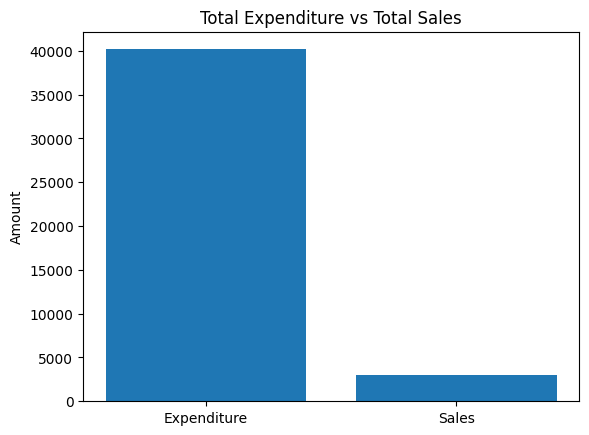

In [30]:
# visualize the total expenditure and sales
total_exp_sales = df[['expenditure', 'Sales']].sum()

plt.bar(['Expenditure', 'Sales'], total_exp_sales)
plt.ylabel('Amount')
plt.title('Total Expenditure vs Total Sales')
plt.show()

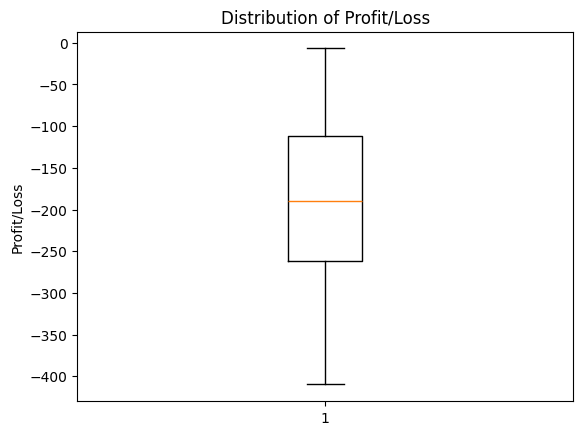

In [31]:
# box plot to show the distribution of profit
plt.boxplot(df['profit'])
plt.ylabel('Profit/Loss')
plt.title('Distribution of Profit/Loss')
plt.show()

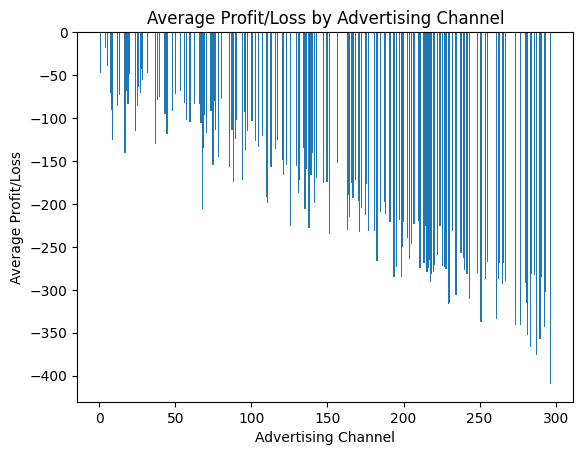

In [32]:
# average profit (or loss) for each advertising channel
avg_profit_by_channel = df.groupby(['TV', 'Radio', 'Newspaper'])['profit'].mean().reset_index()

plt.bar(avg_profit_by_channel['TV'], avg_profit_by_channel['profit'])
plt.xlabel('Advertising Channel')
plt.ylabel('Average Profit/Loss')
plt.title('Average Profit/Loss by Advertising Channel')
plt.show()

In [33]:
# machine learning stage
X = df[['TV', 'Radio', 'Newspaper', 'expenditure']]
y = df['Sales']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [35]:
# model training
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# model predicting
predictions = model.predict(X_test)

In [37]:
# model performance analysis or evaluating
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R-squared:", r2_score(y_test, predictions))

MAE: 1.2748262109549349
MSE: 2.9077569102710923
R-squared: 0.9059011844150826


In [38]:
# interpret the coefficients of the model to understand the impact of each feature on sales
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

       Feature  Coefficient
0           TV     0.014561
1        Radio     0.060998
2    Newspaper    -0.035611
3  expenditure     0.039948


In [ ]:
'''
some notes:

TV: for every one unit increase in TV advertising expenditure,
the model predicts an increase in sales by approximately 0.0146 units

Radio: for every one unit increase in radio advertising expenditure, 
the model predicts an increase in sales by approximately 0.061 units

Newspaper: for every one unit increase in newspaper advertising expenditure, 
the model predicts a decrease in sales by approximately 0.0356 units
(the negative coefficient suggests a negative impact on sales)

Expenditure: for every one unit increase in the total advertising expenditure (sum of TV, radio, and newspaper),
the model predicts an increase in sales by approximately 0.0399 units
'''